In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

### PCA - NumPy

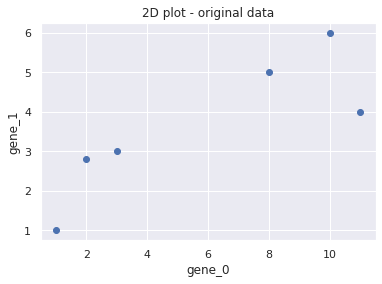

In [2]:
# Step I - Get data and visualize it
gene_0 = np.array([10, 11, 8, 3, 2, 1])
gene_1 = np.array([6, 4, 5, 3, 2.8, 1])
gene_2 = np.array([12, 9, 10, 2.5, 1.3, 2])

plt.scatter(gene_0, gene_1)
plt.xlabel('gene_0')
plt.ylabel('gene_1')
plt.title('2D plot - original data')

X = np.c_[gene_0, gene_1]

Text(0, 0.5, 'gene_1')

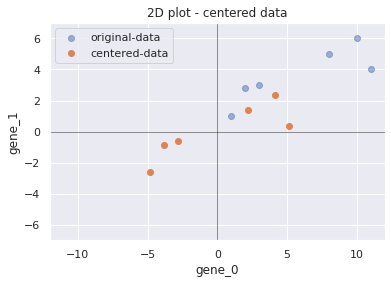

In [3]:
X_centered = X - X.mean(axis=0)

plt.scatter(gene_0, gene_1, alpha=0.5, label='original-data')
plt.scatter(X_centered[:, 0], X_centered[:, 1],  label='centered-data')
plt.axhline(0, c='k', lw=0.5)
plt.axvline(0, c='k', lw=0.5)
plt.title('2D plot - centered data')
plt.legend()
plt.xlim(-12, 12)
plt.ylim(-7, 7)
plt.xlabel('gene_0')
plt.ylabel('gene_1')

In [4]:
U, s, V = np.linalg.svd(X_centered)
c1 = V.T[:, 0]
c2 = V.T[:, 1]

print(c1)
print(c2)

[-0.94171069 -0.33642381]
[-0.33642381  0.94171069]


PCA signular values: [10.31600994638049 2.0116176209323418]
Gene 0 variation: 21.28
Gene 1 variation: 0.81
Gene 0 percent variation: 0.96
Gene 1 percent variation: 0.04


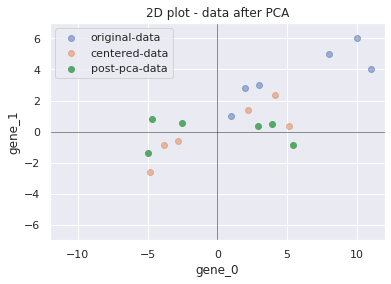

In [5]:
X2D = X_centered.dot(V.T[:, :2])

plt.scatter(gene_0, gene_1, alpha=0.5, label='original-data')
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.5, label='centered-data')
plt.scatter(X2D[:, 0], X2D[:, 1], label='post-pca-data')
plt.axhline(0, c='k', lw=0.5)
plt.axvline(0, c='k', lw=0.5)
plt.title('2D plot - data after PCA')
plt.legend()
plt.xlim(-12, 12)
plt.ylim(-7, 7)
plt.xlabel('gene_0')
plt.ylabel('gene_1')

print('PCA signular values: [{} {}]'.format(np.sqrt(sum([np.square(x[0]) for x in X2D])), 
                                            np.sqrt(sum([np.square(x[1]) for x in X2D]))))

gene0_var = sum([np.square(x[0]) for x in X2D]) / (X2D.shape[0] - 1)
gene1_var = sum([np.square(x[1]) for x in X2D]) / (X2D.shape[0] - 1)

print(f'Gene 0 variation: {gene0_var:.2f}') 
print(f'Gene 1 variation: {gene1_var:.2f}')

print(f'Gene 0 percent variation: {gene0_var / (gene0_var + gene1_var):.2f}') 
print(f'Gene 1 percent variation: {gene1_var / (gene0_var + gene1_var):.2f}')


### PCA - Sklearn

PCA signular values: [10.31600995  2.01161762]
Gene 0 percent variation: 21.28
Gene 1 percent variation: 0.81
Gene 0 percent variation: 0.96
Gene 1 percent variation: 0.04


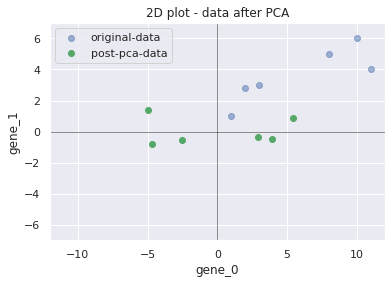

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

plt.scatter(gene_0, gene_1, alpha=0.5, label='original-data')
plt.scatter(100, 100)
plt.scatter(X2D[:, 0], X2D[:, 1], label='post-pca-data')
plt.axhline(0, c='k', lw=0.5)
plt.axvline(0, c='k', lw=0.5)
plt.title('2D plot - data after PCA')
plt.legend()
plt.xlim(-12, 12)
plt.ylim(-7, 7)
plt.xlabel('gene_0')
plt.ylabel('gene_1')

print('PCA signular values:',pca.singular_values_)
print(f'Gene 0 percent variation: {pca.explained_variance_[0]:.2f}') 
print(f'Gene 1 percent variation: {pca.explained_variance_[1]:.2f}')
print(f'Gene 0 percent variation: {pca.explained_variance_ratio_[0]:.2f}') 
print(f'Gene 1 percent variation: {pca.explained_variance_ratio_[1]:.2f}')

## PCA - 3D data

No handles with labels found to put in legend.


Text(0, 0.5, 'gene_1')

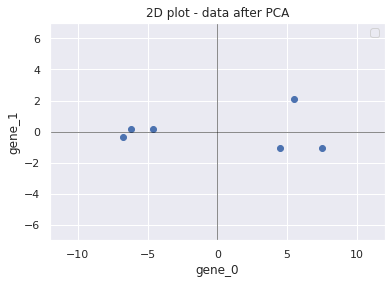

In [25]:
X = np.c_[gene_0, gene_1, gene_2]
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

plt.scatter(X2D[:, 0], X2D[:, 1])
plt.axhline(0, c='k', lw=0.5)
plt.axvline(0, c='k', lw=0.5)
plt.title('2D plot - data after PCA')
plt.legend()
plt.xlim(-12, 12)
plt.ylim(-7, 7)
plt.xlabel('gene_0')
plt.ylabel('gene_1')


## Choosing the Right Number of Dimensions

In [0]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

Best d (variance >= 95): 154


(-10.0, 300.0)

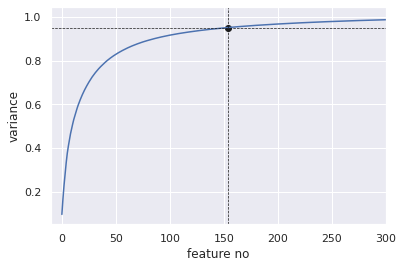

In [50]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
best_d = np.argmax(cumsum >= 0.95) + 1

print('Best d (variance >= 95):', best_d)

plt.plot(cumsum)
plt.scatter(best_d, 0.95, c='k')
plt.axvline(best_d, c='k', ls='--', lw=0.7)
plt.axhline(0.95, c='k', ls='--', lw=0.7)
plt.xlabel('feature no')
plt.ylabel('variance')
plt.xlim(-10, 300)


In [40]:
pca = PCA(n_components=best_d)
X_new = pca.fit_transform(X)
X_new.shape

(70000, 154)

In [51]:
pca = PCA(n_components=0.95)
X_new = pca.fit_transform(X)
X_new.shape

(70000, 154)

## PCA for Compression

In [0]:
qpca = PCA(n_components=0.95)
X_copressed = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_copressed)

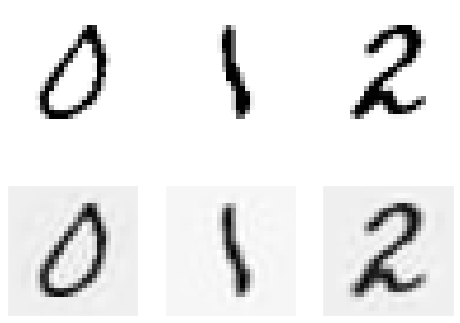

In [84]:
rnd_idx = np.random.randint(0, high=X.shape[0], size=3)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))

for row, dataset in zip(axes, [X, X_recovered]):
    for ax, idx in zip(row, rnd_idx):
        ax.imshow(dataset[idx].reshape(28, 28), cmap='Greys')
        ax.set_xticks([])
        ax.set_yticks([])


## Incremental PCA

In [94]:
from sklearn.decomposition import IncrementalPCA
from tqdm import tqdm

n_batches = 100
ipca = IncrementalPCA(n_components=154)

for X_batch in tqdm(np.array_split(X, n_batches)):
    ipca.partial_fit(X_batch)

X_compressed = ipca.transform(X)

100%|██████████| 100/100 [00:41<00:00,  2.42it/s]


## Randomized PCA

In [0]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_compressed = rnd_pca.fit_transform(X)

## Kernel PCA

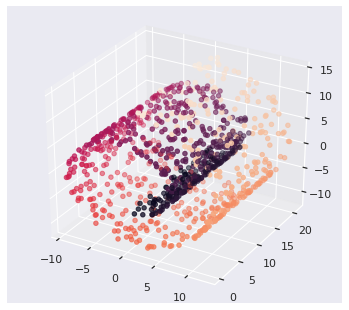

In [109]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll


X, y = make_swiss_roll(n_samples=1000)

fig = plt.figure(figsize=(6, 12))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)

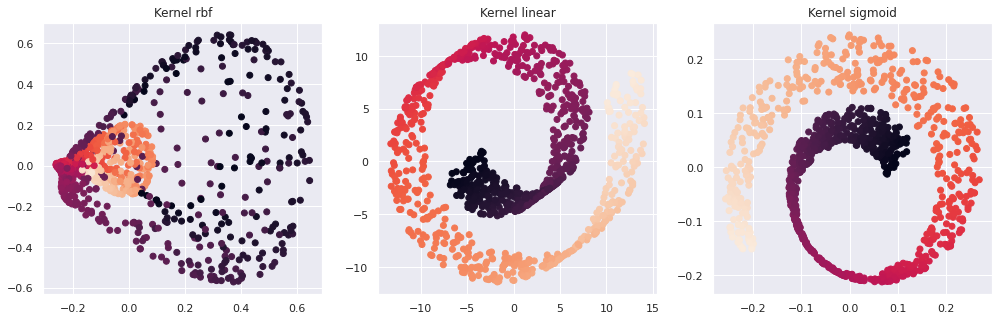

In [122]:
parameters = [dict(n_components=2, kernel='rbf', gamma=0.04),
              dict(n_components=2, kernel='linear'),
              dict(n_components=2, kernel='sigmoid', gamma=0.001)]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17,5))

for ax, param in zip(axes, parameters):
    rbf_pca = KernelPCA(**param)
    X_reduced = rbf_pca.fit_transform(X)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
    kernel = param['kernel']
    ax.set_title(f'Kernel {kernel}')